In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [54]:
df = pd.read_csv("/content/supermarket.csv")

In [55]:
df

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Payment,cogs,gross margin percentage,gross income,Rating
0,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1
1,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6
2,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4
3,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4
4,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Giza,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,Ewallet,40.35,4.761905,2.0175,6.2
996,Cairo,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,Ewallet,973.80,4.761905,48.6900,4.4
997,Alex,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,Cash,31.84,4.761905,1.5920,7.7
998,Alex,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,Cash,65.82,4.761905,3.2910,4.1


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   object 
 1   City                     1000 non-null   object 
 2   Customer type            1000 non-null   object 
 3   Gender                   1000 non-null   object 
 4   Product line             1000 non-null   object 
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7   Tax 5%                   1000 non-null   float64
 8   Sales                    1000 non-null   float64
 9   Payment                  1000 non-null   object 
 10  cogs                     1000 non-null   float64
 11  gross margin percentage  1000 non-null   float64
 12  gross income             1000 non-null   float64
 13  Rating                   1000 non-null   float64
dtypes: float64(7), int64(1), 

# Without considering correlation among features.


## Numerical Columns

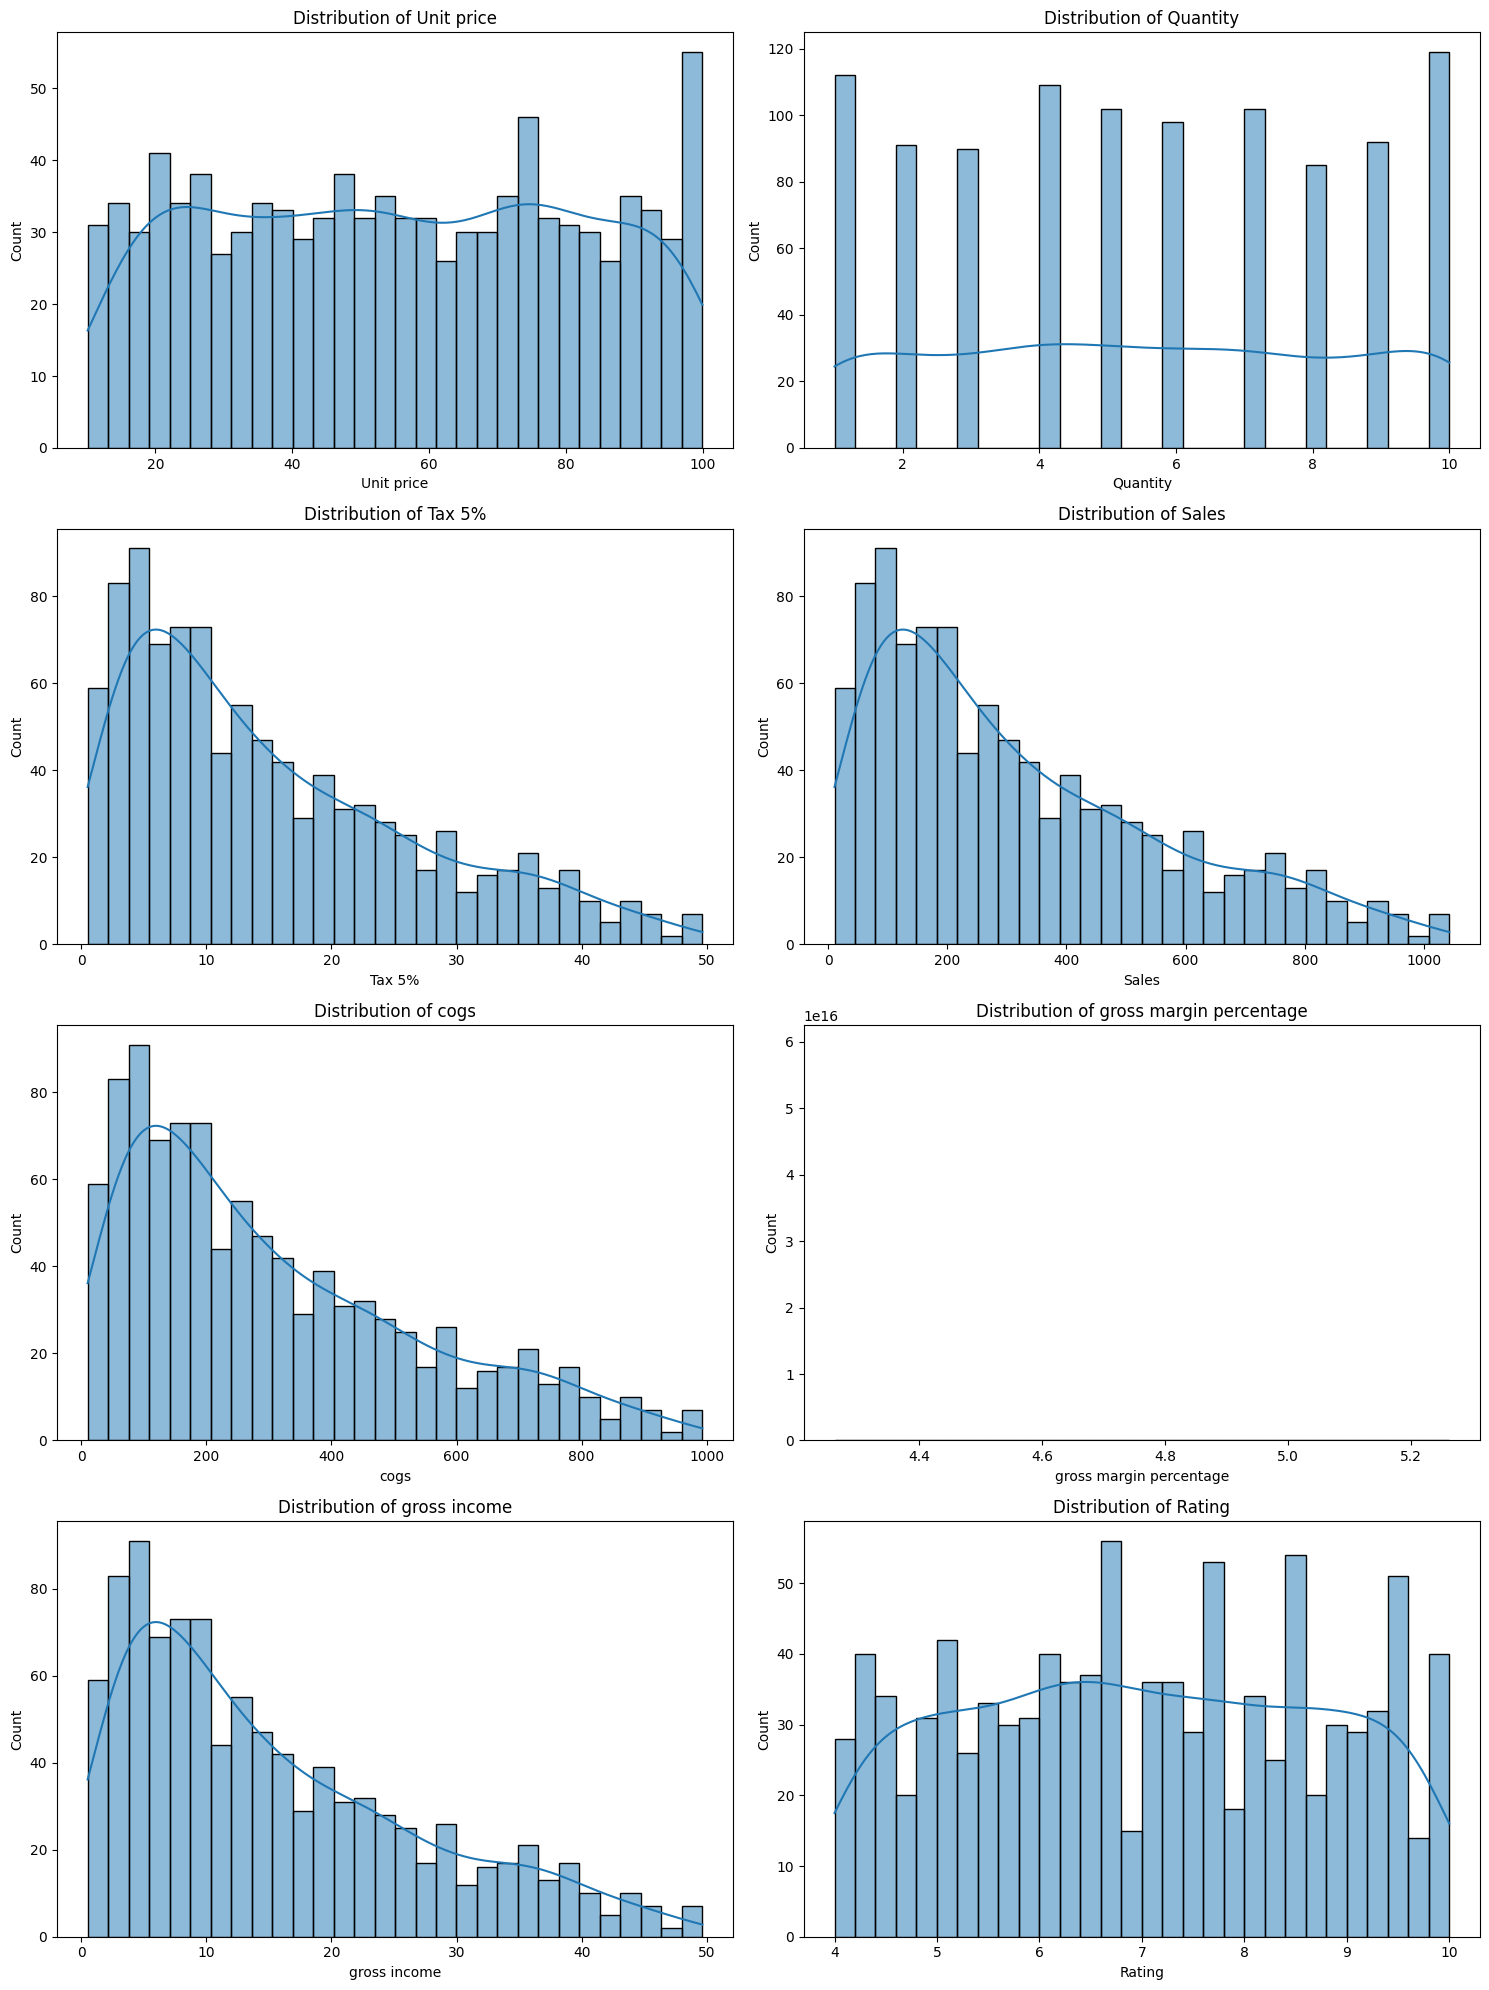

In [57]:
# numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms for numerical columns
num_plots = len(numerical_columns)
rows = (num_plots + 1) // 2  # Adjust the number of rows
fig, axes = plt.subplots(rows, 2, figsize=(15, 5 * rows))

for i, column in enumerate(numerical_columns):
    ax = axes[i // 2, i % 2] if num_plots > 1 else axes
    sns.histplot(df[column], kde=True, bins=30, ax=ax)
    ax.set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

### Uniform Distribution

columns = 3

Unit Price, Quantity, Rating

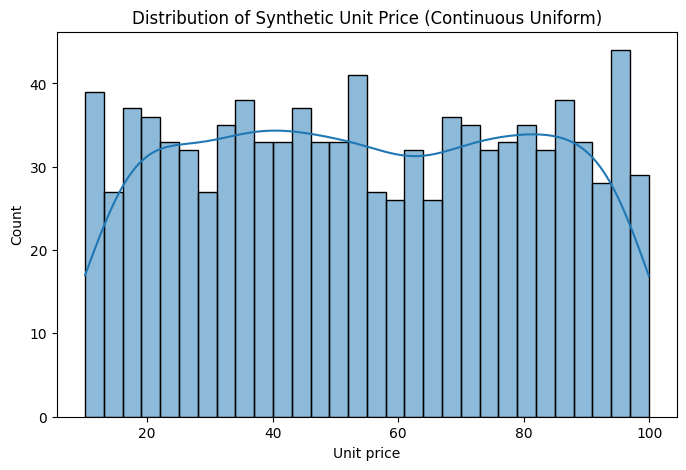

In [58]:
# Generate 1000 synthetic data points for Unit Price using uniform distribution
unit_price_synthetic = np.random.uniform(low=10, high=100, size=1000)

# Create a DataFrame to store the synthetic data
synthetic_df = pd.DataFrame({
    'Unit price': unit_price_synthetic
})

# Plot the synthetic data distribution
plt.figure(figsize=(8, 5))
sns.histplot(synthetic_df['Unit price'], kde=True, bins=30)
plt.title('Distribution of Synthetic Unit Price (Continuous Uniform)')
plt.show()

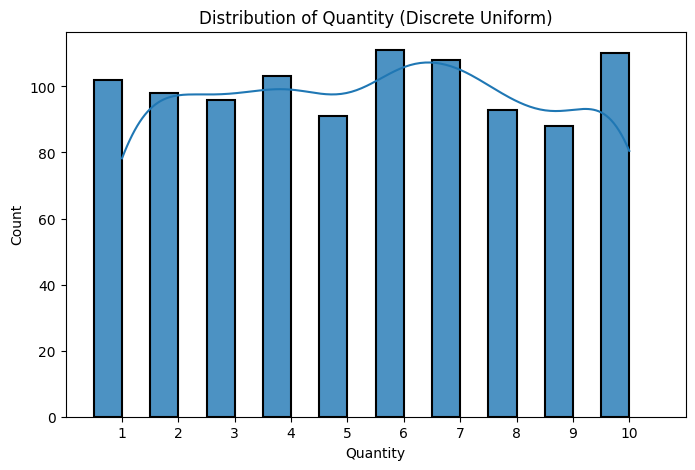

In [59]:
# Generating a discrete uniform distribution for Quantity (between 1 and 10)
quantity_synthetic = np.random.randint(1, 11, size=1000)

synthetic_df['Quantity'] = quantity_synthetic

fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(synthetic_df['Quantity'], bins=range(1, 12), kde=True, discrete=True, linewidth=1.5, ax=ax,  alpha=0.8)
for patch in ax.patches:
    patch.set_width(0.5)  # Set bar width smaller

# Adjust plot style and settings to match the desired output
ax.set_title('Distribution of Quantity (Discrete Uniform)')
ax.set_xlabel('Quantity')
ax.set_ylabel('Count')
ax.set_xticks(range(1, 11))  # Ensure all values from 1 to 10 are shown
ax.grid(False)  # Disable grid if it's not present in the target plot
plt.show()

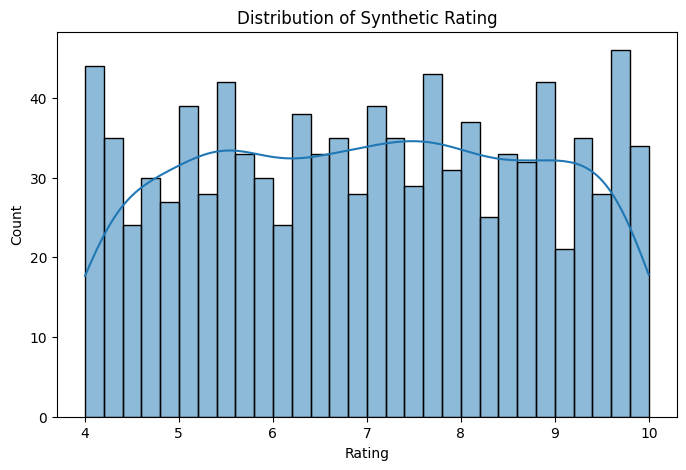

In [60]:
rating_synthetic = np.random.uniform(low=4, high=10, size=1000)

synthetic_df['Rating'] = rating_synthetic

# Plot the synthetic data distribution
plt.figure(figsize=(8, 5))
sns.histplot(synthetic_df['Rating'], kde=True, bins=30)
plt.title('Distribution of Synthetic Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

### gamma distribution

columns:4

Tax 5%, Sales, Cogs , and gross income

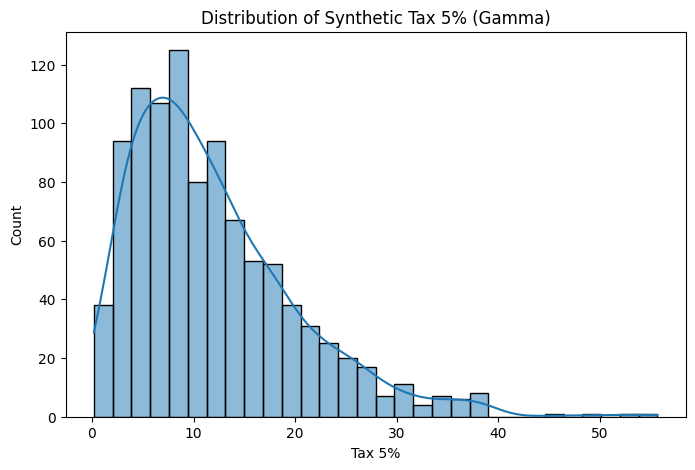

In [61]:
# Adjust shape and scale to mimic your plot
shape, scale = 2, 6  # Example parameters; you can tune these
tax_synthetic = np.random.gamma(shape, scale, 1000)

synthetic_df['Tax 5%'] = tax_synthetic

# Plot the synthetic data distribution
plt.figure(figsize=(8, 5))
sns.histplot(synthetic_df['Tax 5%'], kde=True, bins=30)
plt.title('Distribution of Synthetic Tax 5% (Gamma)')
plt.xlabel('Tax 5%')
plt.ylabel('Count')
plt.show()

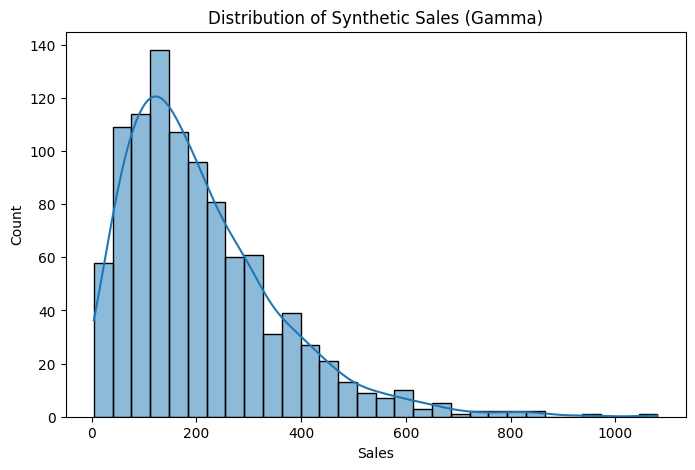

In [62]:
# Adjust shape and scale to mimic your plot
shape, scale = 2, 100  # Example parameters; you can tune these
sales_synthetic = np.random.gamma(shape, scale, 1000)


synthetic_df['Sales'] = sales_synthetic


# Plot the synthetic data distribution
plt.figure(figsize=(8, 5))
sns.histplot(synthetic_df['Sales'], kde=True, bins=30)
plt.title('Distribution of Synthetic Sales (Gamma)')
plt.xlabel('Sales')
plt.ylabel('Count')
plt.show()


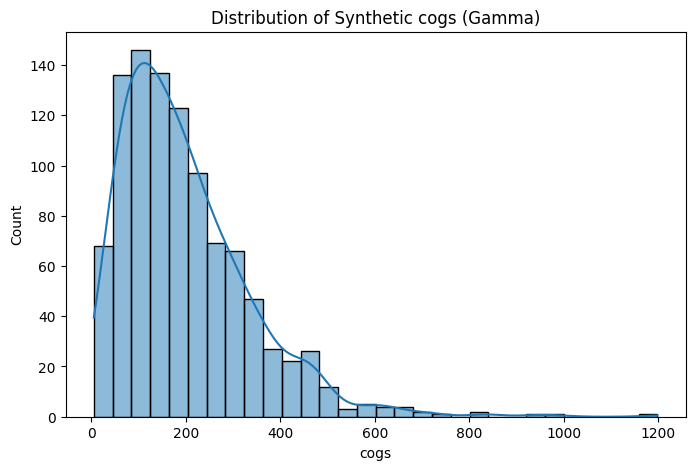

In [63]:
# Adjust shape and scale to mimic your plot
shape, scale = 2, 100  # Example parameters; you can tune these
cogs_synthetic = np.random.gamma(shape, scale, 1000)

synthetic_df['cogs'] = cogs_synthetic

# Plot the synthetic data distribution
plt.figure(figsize=(8, 5))
sns.histplot(synthetic_df['cogs'], kde=True, bins=30)
plt.title('Distribution of Synthetic cogs (Gamma)')
plt.xlabel('cogs')
plt.ylabel('Count')
plt.show()


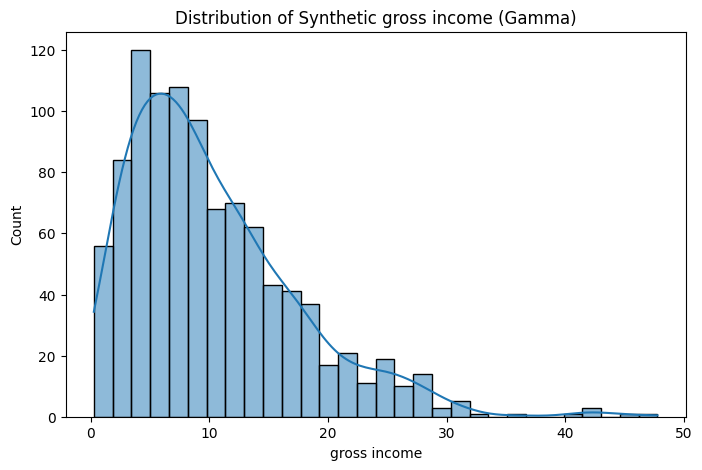

In [64]:
# Adjust shape and scale to mimic your plot
shape, scale = 2, 5  # Example parameters; you can tune these
gi_synthetic = np.random.gamma(shape, scale, 1000)


synthetic_df['gross income'] = gi_synthetic

# Plot the synthetic data distribution
plt.figure(figsize=(8, 5))
sns.histplot(synthetic_df['gross income'], kde=True, bins=30)
plt.title('Distribution of Synthetic gross income (Gamma)')
plt.xlabel('gross income')
plt.ylabel('Count')
plt.show()


### Generate data for constant column

In [65]:
# Check if the column has only one unique value
unique_values = df['gross margin percentage'].unique()
print(unique_values)


[4.76190476]


In [66]:
# Create a DataFrame with 1000 rows of the constant value for "gross margin percentage"
synthetic_df['gross margin percentage'] = [4.76190476] * 1000

In [67]:
synthetic_df.head()

,Unit price,Quantity,Rating,Tax 5%,Sales,cogs,gross income,gross margin percentage
0,70.986888,9,9.642682,32.628152,116.298875,100.439097,11.628601,4.761905
1,68.258646,7,9.301870,26.911511,102.265409,63.040412,2.081821,4.761905
2,45.140807,10,4.701391,9.146890,443.097749,186.815003,3.822718,4.761905
3,63.617862,9,9.996965,3.587593,458.035394,161.805939,6.275882,4.761905
4,90.836384,10,5.077574,7.883632,104.484710,189.835287,7.337250,4.761905


## Categorical columns

<ipython-input-68-1e844f297973>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-68-1e844f297973>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-68-1e844f297973>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-68-1e844f297973>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-68-1e844f297973>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-68-1e844f297973>:13: UserWarning: FixedFormatter should only be used together with FixedLo

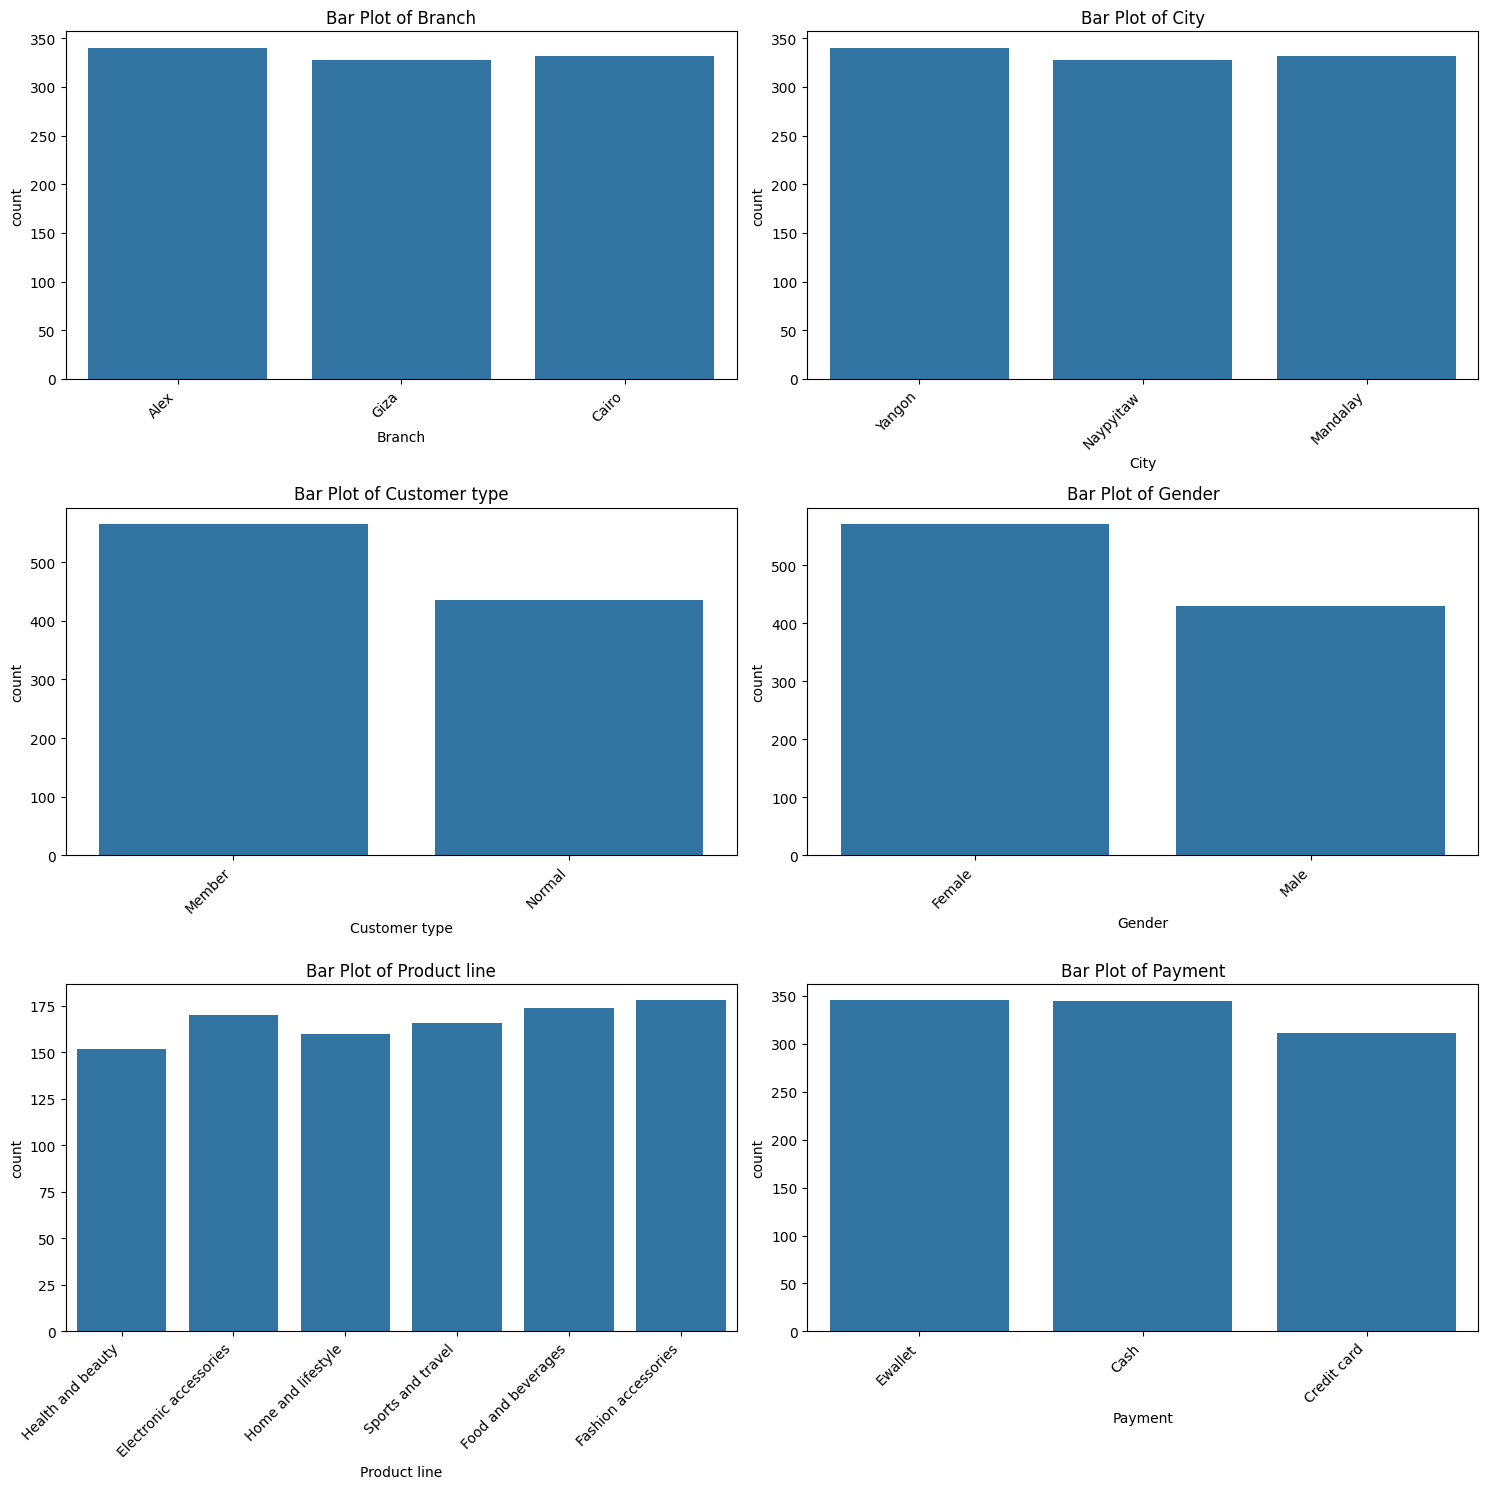

In [68]:
# categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Plot bar plots for categorical columns
cat_plots = len(categorical_columns)
rows = (cat_plots + 1) // 2  # Adjust the number of rows
fig, axes = plt.subplots(rows, 2, figsize=(15, 5 * rows))

for i, column in enumerate(categorical_columns):
    ax = axes[i // 2, i % 2] if cat_plots > 1 else axes
    sns.countplot(x=column, data=df, ax=ax)
    ax.set_title(f'Bar Plot of {column}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [69]:
# Assuming df is your DataFrame and "Branch" is the column you want to count
branch_counts = df['Branch'].value_counts()

# Display the counts for each category
print(branch_counts)

Branch
Alex     340
Cairo    332
Giza     328
Name: count, dtype: int64


### Discrete  Uniform

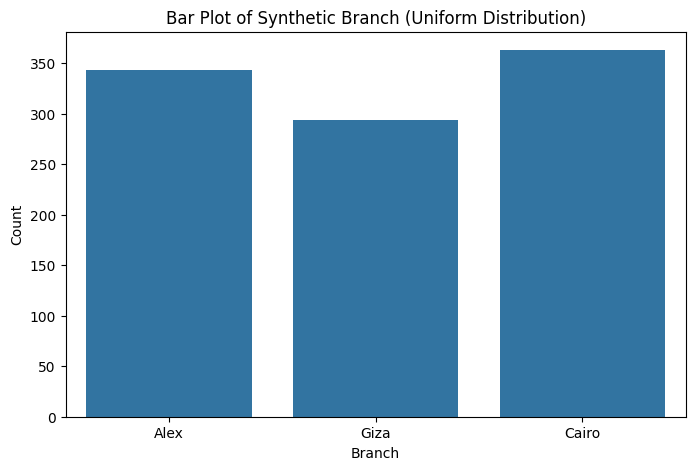

In [70]:
# Generate synthetic data for 'Branch' using equal probabilities
branches = ['Alex', 'Giza', 'Cairo']
branch_synthetic = np.random.choice(branches, size=1000, p=[1/3, 1/3, 1/3])  # Equal probabilities

# Assuming synthetic_df is already created
synthetic_df['Branch'] = branch_synthetic

# Ensure the correct order of 'Branch' categories when plotting
branch_order = ['Alex', 'Giza', 'Cairo']  # Desired order of categories

# Plot the synthetic data distribution with the correct order
plt.figure(figsize=(8, 5))
sns.countplot(x='Branch', data=synthetic_df, order=branch_order)
plt.title('Bar Plot of Synthetic Branch (Uniform Distribution)')
plt.xlabel('Branch')
plt.ylabel('Count')

# Show the plot
plt.show()

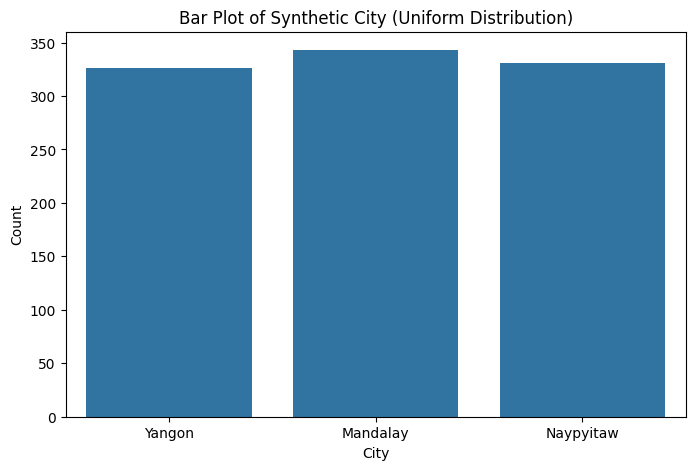

In [71]:
# Generate synthetic data for 'Branch' using equal probabilities
Cites = ['Yangon', 'Mandalay', 'Naypyitaw']
City_synthetic = np.random.choice(Cites, size=1000, p=[1/3, 1/3, 1/3])  # Equal probabilities

synthetic_df['City']= City_synthetic

# Plot the synthetic data distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='City', data=synthetic_df)
plt.title('Bar Plot of Synthetic City (Uniform Distribution)')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

In [72]:
# Assuming df is your DataFrame and "city" is the column you want to count
Product_counts = df['Product line'].value_counts()
payment_counts = df['Payment'].value_counts()

# Display the counts for each category
print(Product_counts)
print(payment_counts)

Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64
Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64


### Weighted Categorical

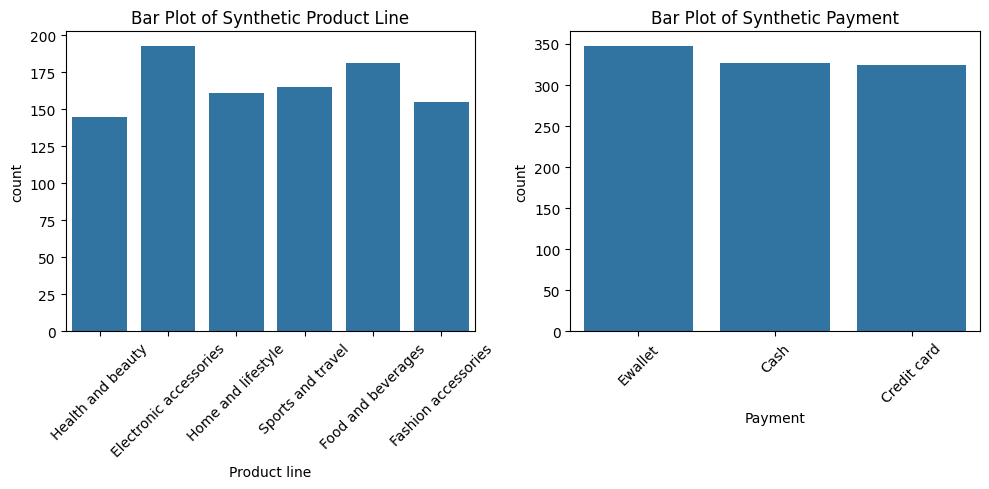

In [73]:
# Corrected Product Line Categories and their actual frequencies
product_line_categories = ['Health and beauty', 'Electronic accessories', 'Home and lifestyle',
                           'Sports and travel', 'Food and beverages', 'Fashion accessories']
product_line_counts = [152, 170, 160, 166, 174, 178]  # Based on actual counts you provided
product_line_total = sum(product_line_counts)
product_line_probabilities = [count / product_line_total for count in product_line_counts]

# Corrected Payment Categories and their actual frequencies
payment_categories = ['Ewallet', 'Cash', 'Credit card']
payment_counts = [345, 344, 311]  # Based on actual counts you provided
payment_total = sum(payment_counts)
payment_probabilities = [count / payment_total for count in payment_counts]

# Generate synthetic data for Product Line and Payment based on the observed frequencies
synthetic_product_line = np.random.choice(product_line_categories, size=1000, p=product_line_probabilities)
synthetic_payment = np.random.choice(payment_categories, size=1000, p=payment_probabilities)


synthetic_df['Product line'] = synthetic_product_line
synthetic_df['Payment'] = synthetic_payment


# Plot the synthetic data for Product Line
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Product line', data=synthetic_df, order=product_line_categories)  # Ensure correct order
plt.xticks(rotation=45)
plt.title('Bar Plot of Synthetic Product Line')

# Plot the synthetic data for Payment
plt.subplot(1, 2, 2)
sns.countplot(x='Payment', data=synthetic_df, order=payment_categories)  # Ensure correct order
plt.xticks(rotation=45)
plt.title('Bar Plot of Synthetic Payment')

plt.tight_layout()
plt.show()


In [74]:
# Assuming df is your DataFrame and "city" is the column you want to count
Product_counts = synthetic_df['Product line'].value_counts()
payment_counts = synthetic_df['Payment'].value_counts()

# Display the counts for each category
print(Product_counts)
print(payment_counts)

Product line
Electronic accessories    193
Food and beverages        181
Sports and travel         165
Home and lifestyle        161
Fashion accessories       155
Health and beauty         145
Name: count, dtype: int64
Payment
Ewallet        348
Cash           327
Credit card    325
Name: count, dtype: int64


### Binomial Distribution

In [75]:
# Assuming df is your DataFrame and "city" is the column you want to count
Product_counts = df['Customer type'].value_counts()
payment_counts = df['Gender'].value_counts()

# Display the counts for each category
print(Product_counts)
print(payment_counts)

Customer type
Member    565
Normal    435
Name: count, dtype: int64
Gender
Female    571
Male      429
Name: count, dtype: int64


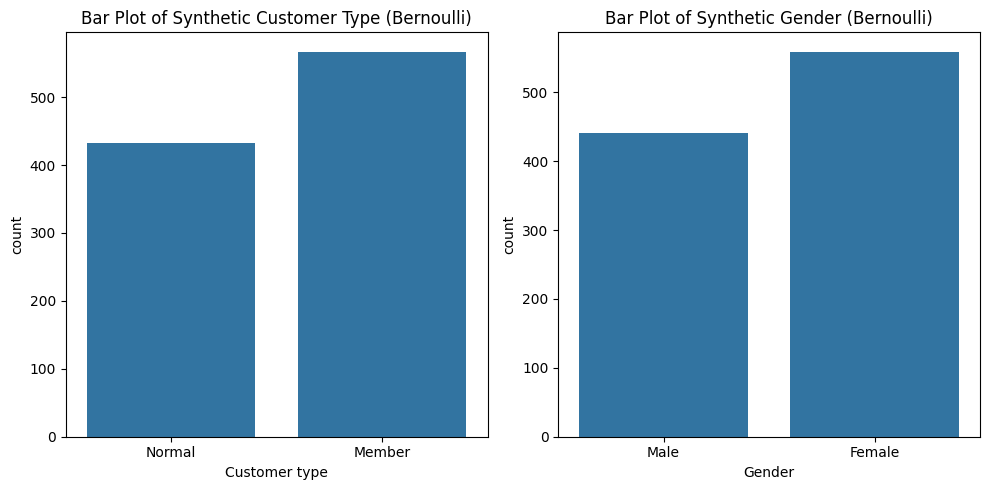

In [76]:
# Parameters for Customer Type (Member = 1, Normal = 0)
p_customer_type_member = 565 / (565 + 435)  # Probability for "Member"
customer_type_synthetic = np.random.binomial(1, p_customer_type_member, size=1000)

# Parameters for Gender (Female = 1, Male = 0)
p_gender_female = 570 / (570 + 430)  # Probability for "Female"
gender_synthetic = np.random.binomial(1, p_gender_female, size=1000)

# Map binary outcomes to original categories
synthetic_df['Customer type'] = np.where(customer_type_synthetic == 1, 'Member', 'Normal')
synthetic_df['Gender'] = np.where(gender_synthetic == 1, 'Female', 'Male')


# Plot the synthetic data for Customer Type
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Customer type', data=synthetic_df)
plt.title('Bar Plot of Synthetic Customer Type (Bernoulli)')

# Plot the synthetic data for Gender
plt.subplot(1, 2, 2)
sns.countplot(x='Gender', data=synthetic_df)
plt.title('Bar Plot of Synthetic Gender (Bernoulli)')

plt.tight_layout()
plt.show()

In [77]:
# Assuming df is your DataFrame and "city" is the column you want to count
Product_counts = synthetic_df['Customer type'].value_counts()
payment_counts = synthetic_df['Gender'].value_counts()

# Display the counts for each category
print(Product_counts)
print(payment_counts)

Customer type
Member    567
Normal    433
Name: count, dtype: int64
Gender
Female    559
Male      441
Name: count, dtype: int64


## Visualize side by side

<ipython-input-78-954e72360ec3>:6: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(col) or pd.api.types.is_object_dtype(col)


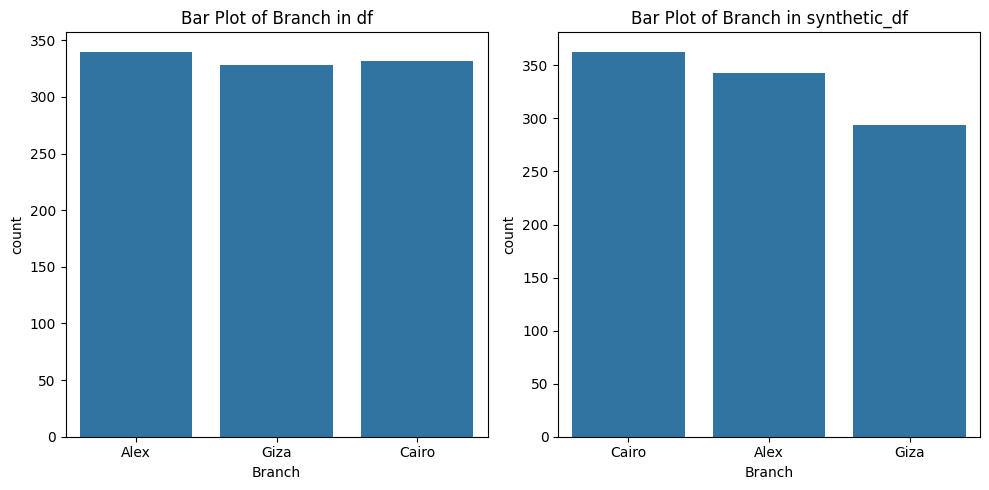

<ipython-input-78-954e72360ec3>:6: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(col) or pd.api.types.is_object_dtype(col)


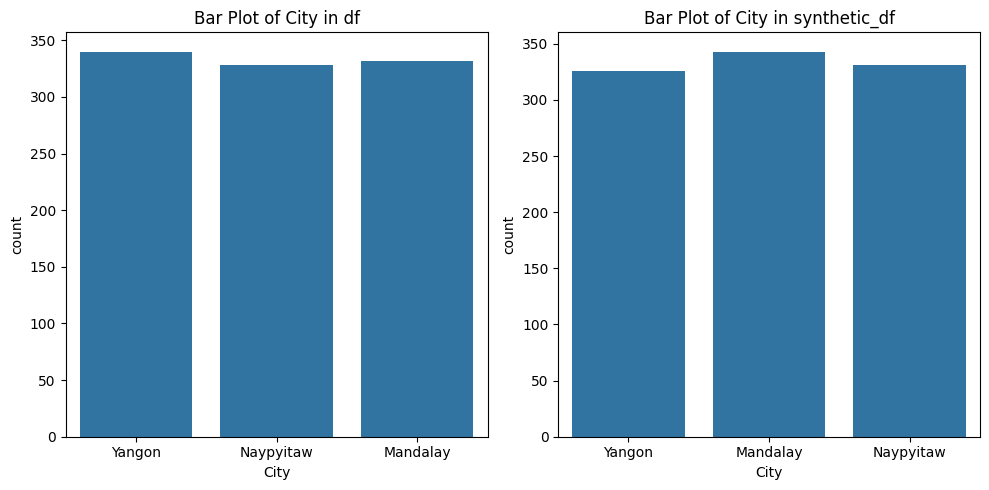

<ipython-input-78-954e72360ec3>:6: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(col) or pd.api.types.is_object_dtype(col)


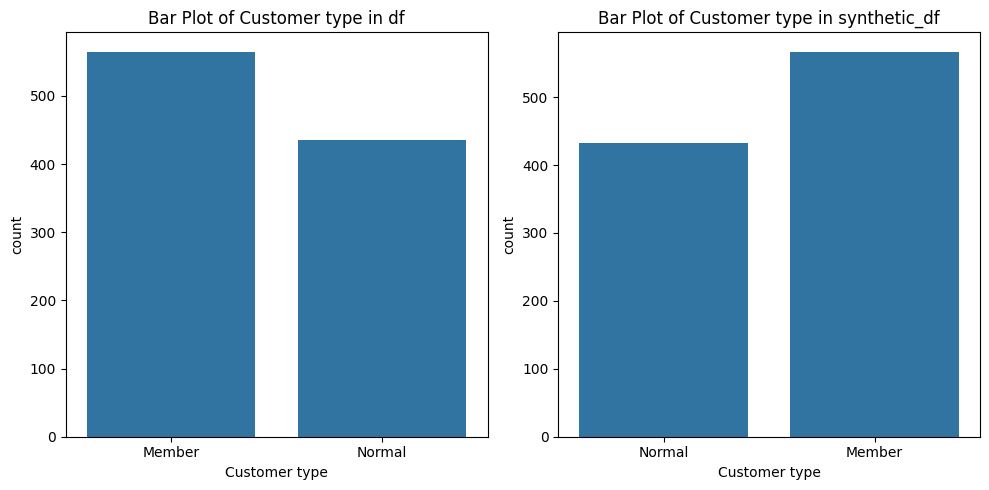

<ipython-input-78-954e72360ec3>:6: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(col) or pd.api.types.is_object_dtype(col)


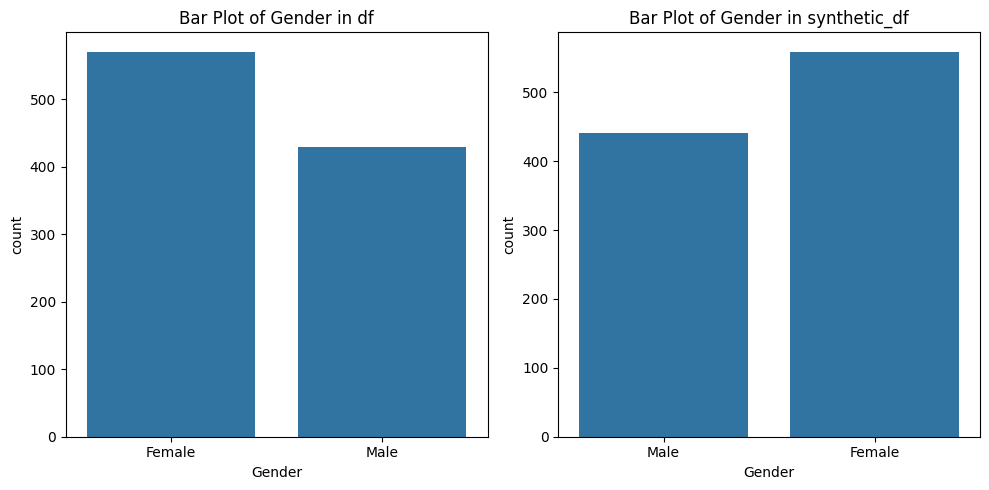

<ipython-input-78-954e72360ec3>:6: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(col) or pd.api.types.is_object_dtype(col)


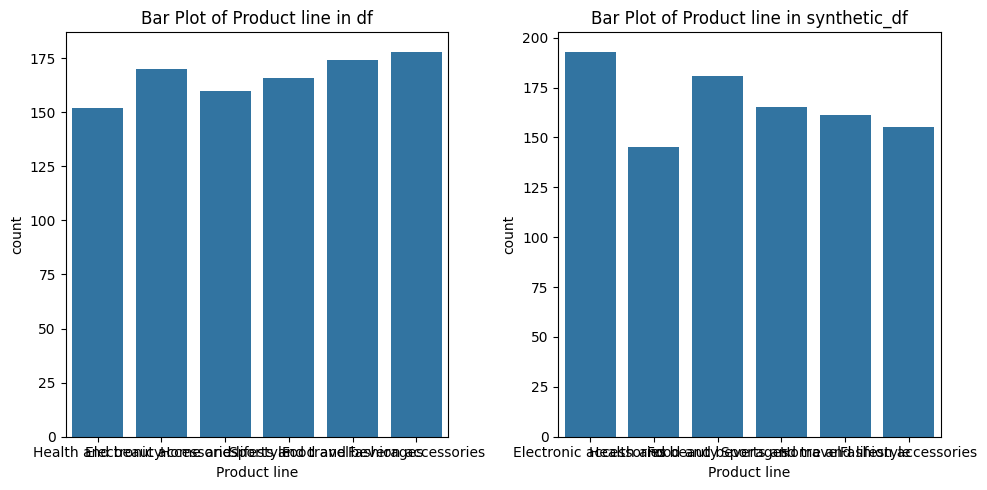

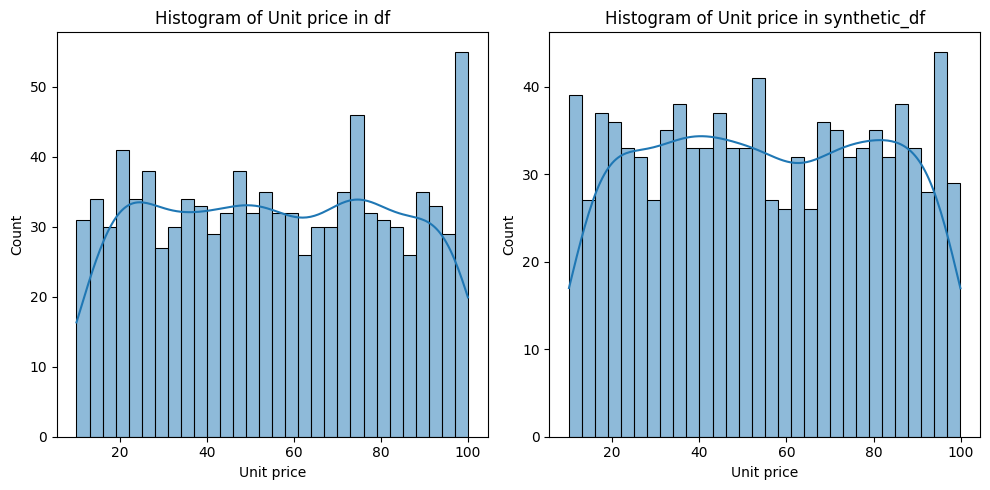

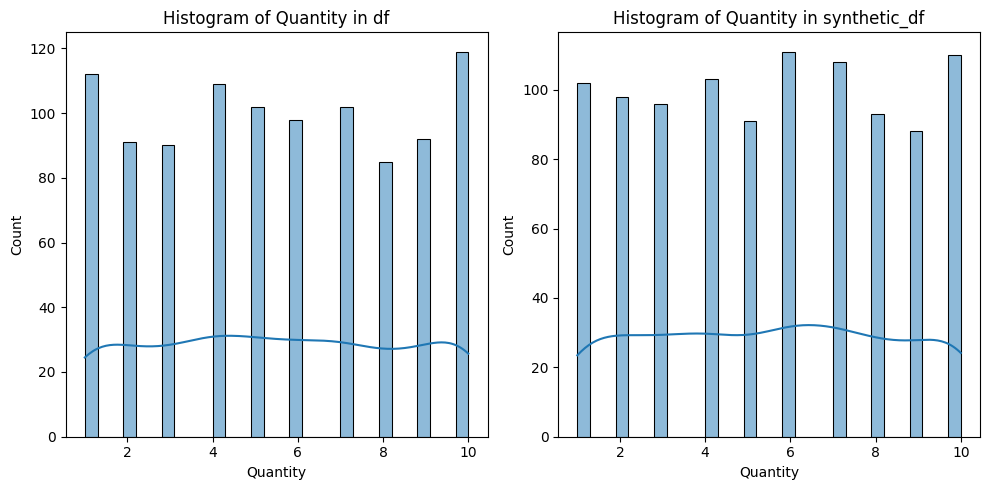

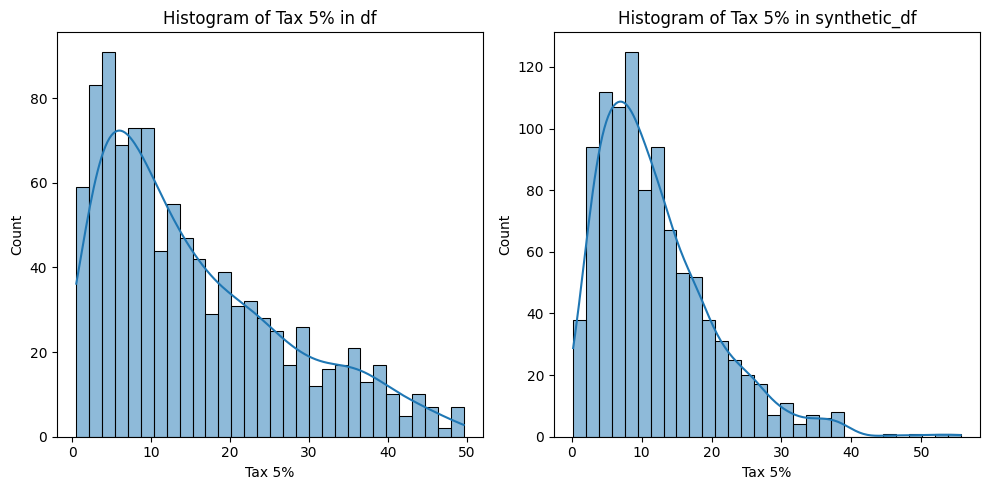

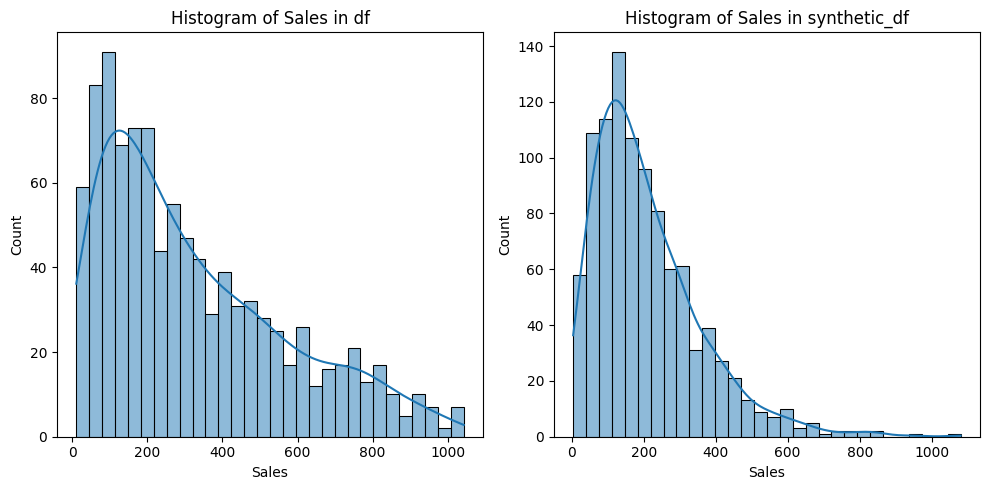

<ipython-input-78-954e72360ec3>:6: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(col) or pd.api.types.is_object_dtype(col)


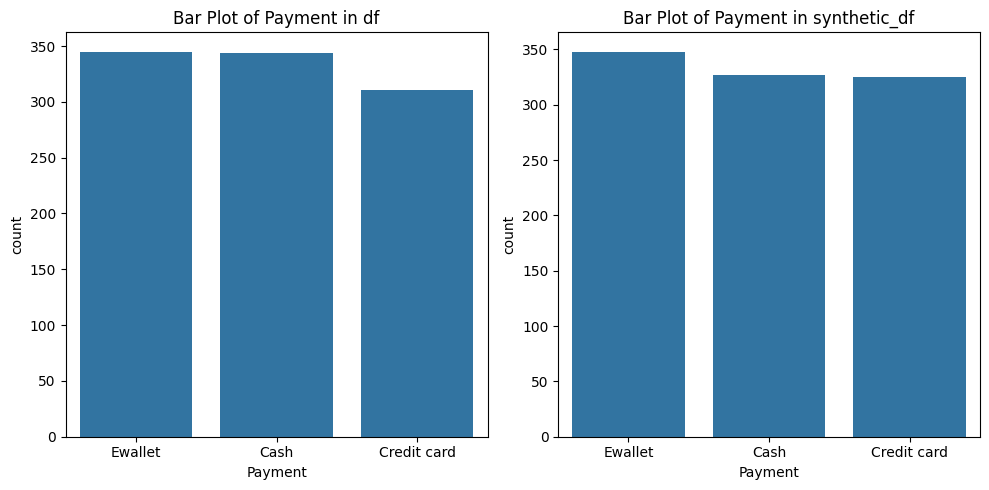

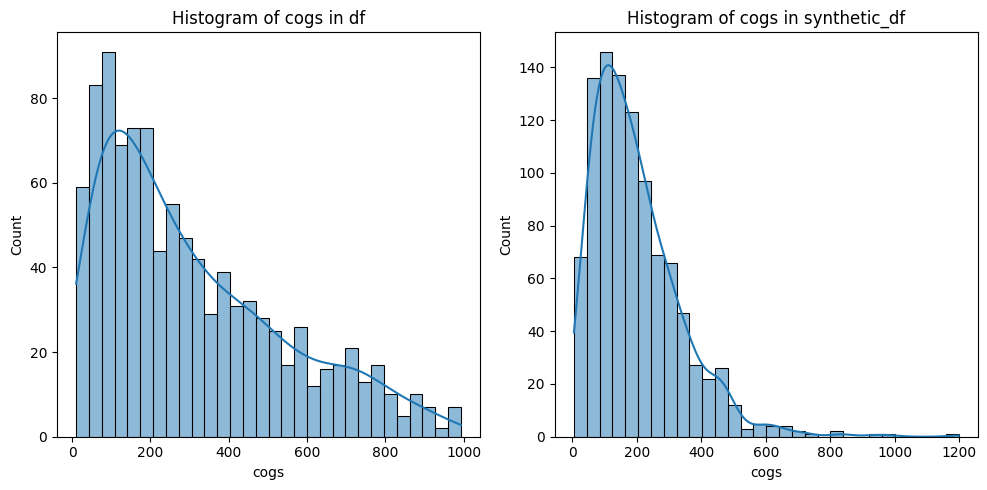

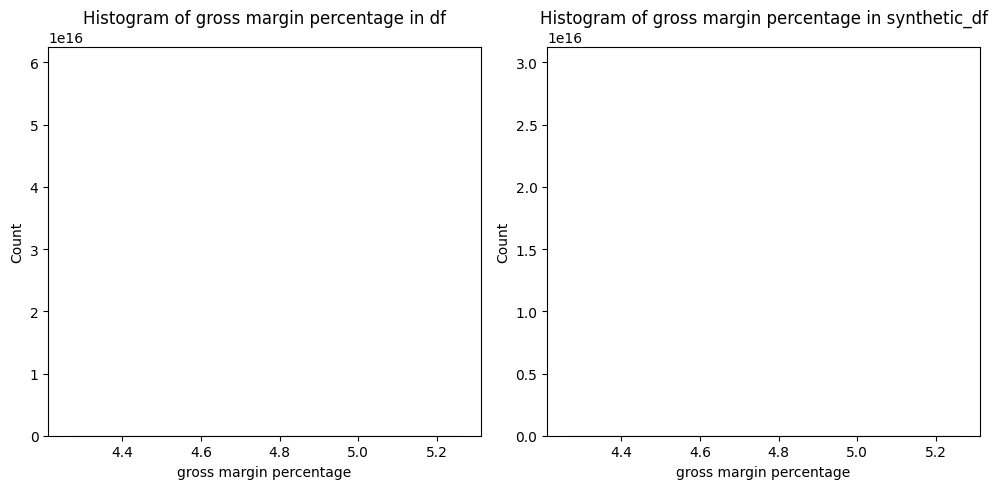

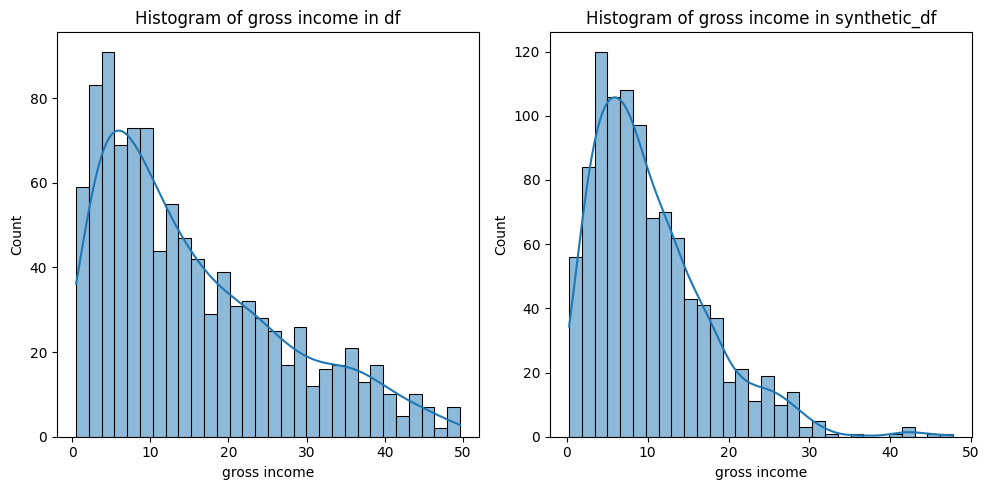

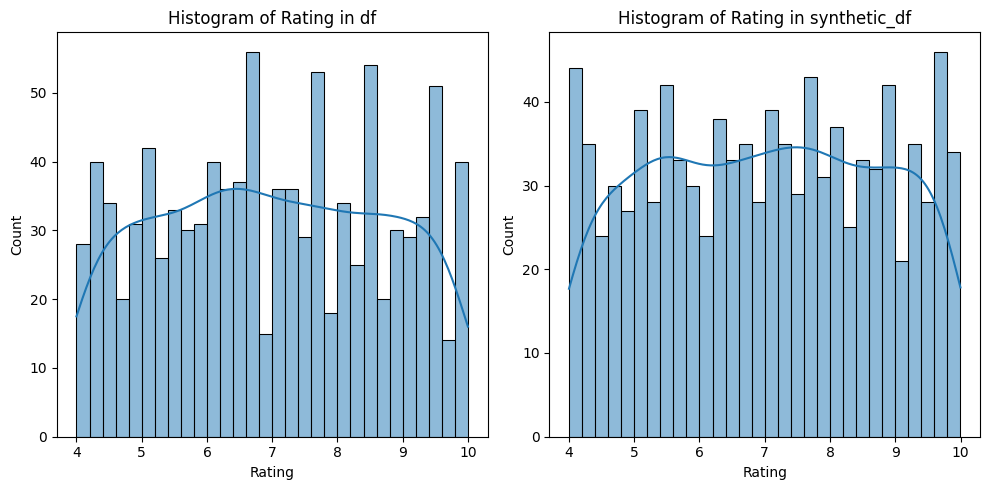

In [78]:
def is_numeric(col):
    return pd.api.types.is_numeric_dtype(col)

# Function to check if a column is categorical
def is_categorical(col):
    return pd.api.types.is_categorical_dtype(col) or pd.api.types.is_object_dtype(col)

# Get common columns between the two DataFrames
common_columns = df.columns.intersection(synthetic_df.columns)

# Loop through common columns and plot side by side
for column in common_columns:
    plt.figure(figsize=(10, 5))

    if is_numeric(df[column]) and is_numeric(synthetic_df[column]):
        # Plot numeric columns as histograms
        plt.subplot(1, 2, 1)
        sns.histplot(df[column], kde=True, bins=30)
        plt.title(f'Histogram of {column} in df')

        plt.subplot(1, 2, 2)
        sns.histplot(synthetic_df[column], kde=True, bins=30)
        plt.title(f'Histogram of {column} in synthetic_df')

    elif is_categorical(df[column]) and is_categorical(synthetic_df[column]):
        # Plot categorical columns as bar plots
        plt.subplot(1, 2, 1)
        sns.countplot(x=df[column])
        plt.title(f'Bar Plot of {column} in df')

        plt.subplot(1, 2, 2)
        sns.countplot(x=synthetic_df[column])
        plt.title(f'Bar Plot of {column} in synthetic_df')

    plt.tight_layout()
    plt.show()

# Considering correlation among features.


In [79]:
# !pip install copulas

In [80]:
from sklearn.preprocessing import LabelEncoder
from copulas.multivariate import GaussianMultivariate

# Encode categorical features if present in the original df
df_encoded = df.copy()
for col in df.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Create a GaussianMultivariate copula model for the second synthetic data
model = GaussianMultivariate()

# Fit the model to your encoded original data
model.fit(df_encoded)

# Generate synthetic data using the copula model
synthetic_df_copula = model.sample(1000)



/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:716: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:721: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  a, b = optimize.fsolve(func, (1.0, 1.0))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:716: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:721: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  a, b = optimize.fsolve(func, (1.0, 1.0))


# Testing Quality of Data

In [81]:
# Desired column order
column_order = [
    'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price',
    'Quantity', 'Tax 5%', 'Sales', 'Payment', 'cogs',
    'gross margin percentage', 'gross income', 'Rating'
]

# Rearranging the synthetic_df columns
synthetic_df = synthetic_df.reindex(columns=column_order)


## Correlation Matrix

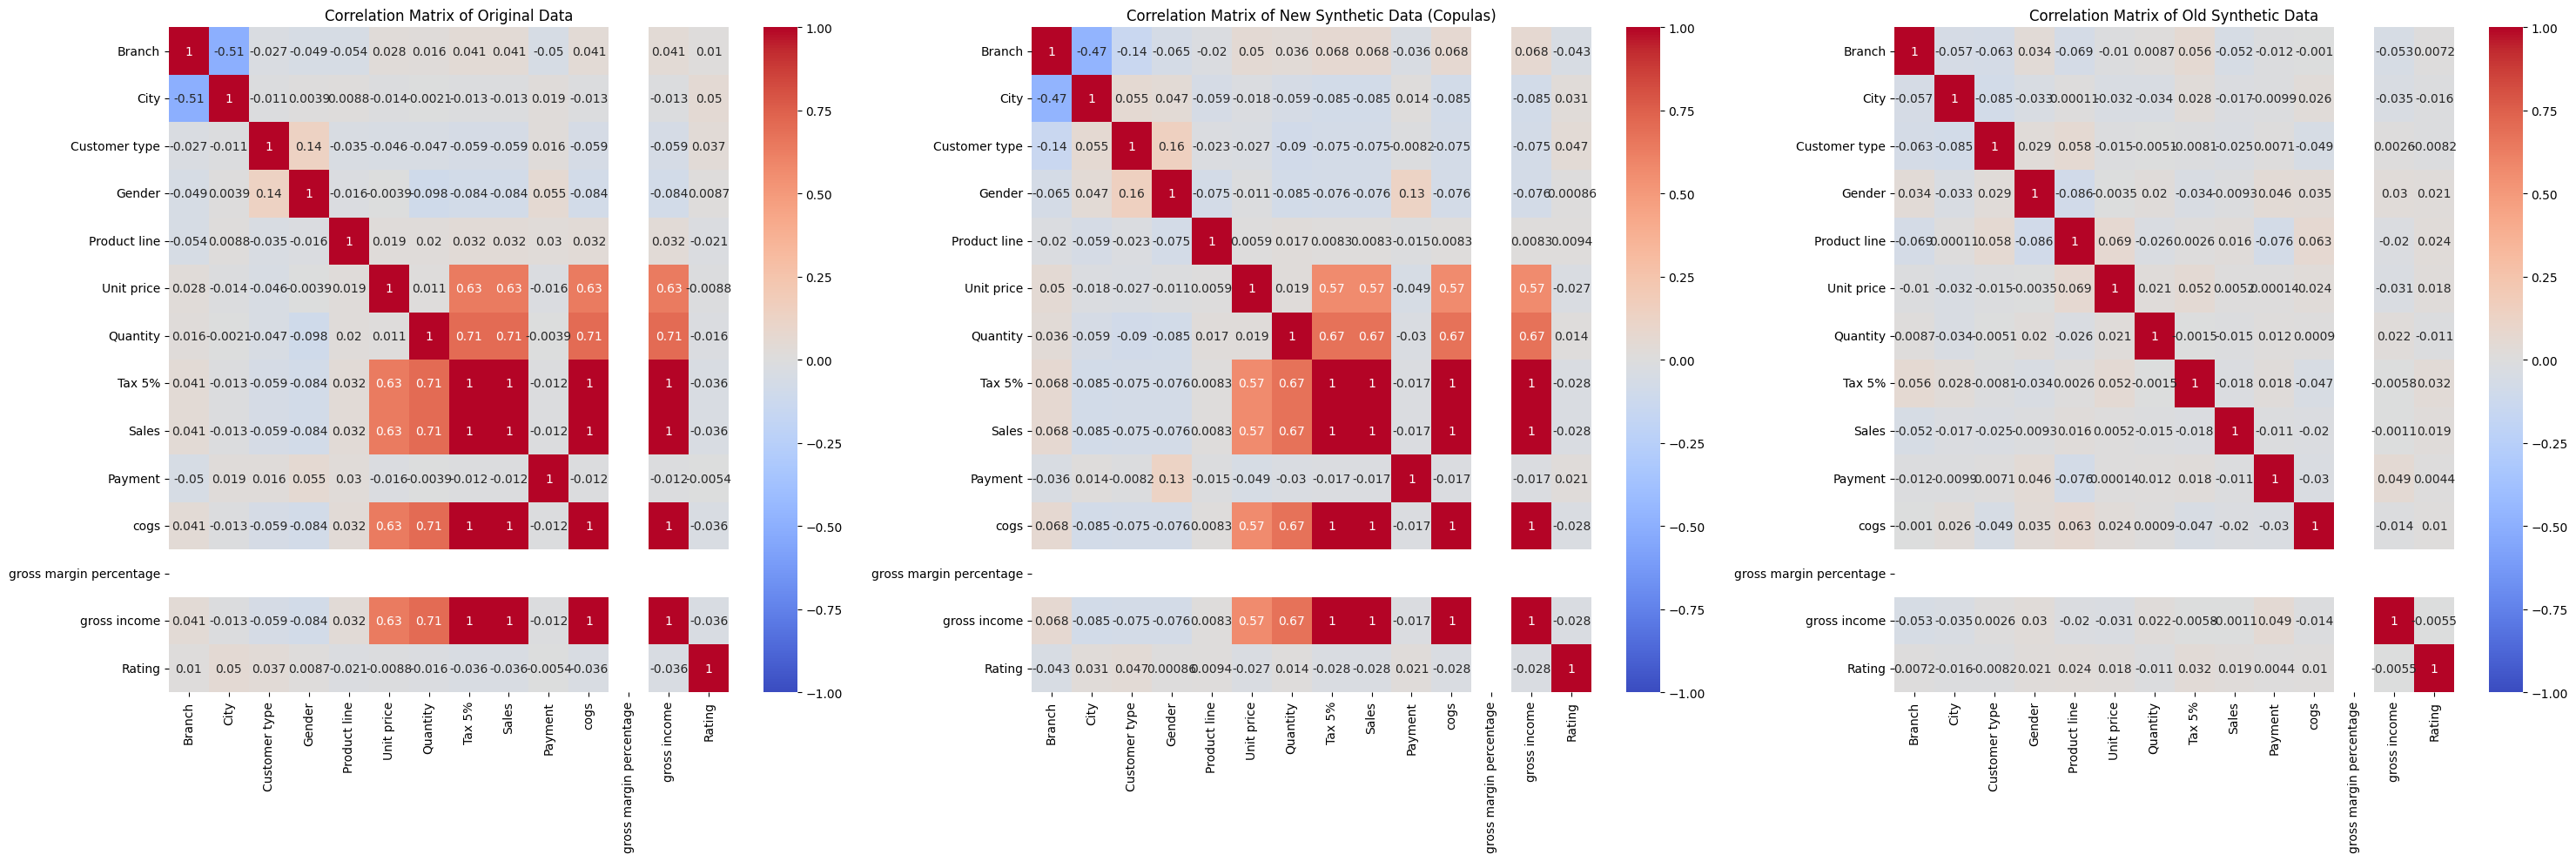

In [82]:
# Step 1: Encode the original dataframe
df_encoded = df.copy()
for col in df.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Step 2: Encode the old synthetic dataframe
synthetic_df_encoded = synthetic_df.copy()
for col in synthetic_df.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    synthetic_df_encoded[col] = le.fit_transform(synthetic_df_encoded[col])

# Step 3: Calculate the correlation matrices for the original, old synthetic, and new copula-generated synthetic data
original_corr = df_encoded.corr()
synthetic_corr_copula = synthetic_df_copula.corr()  # Correlation matrix for new copula-generated synthetic data
old_synthetic_corr = synthetic_df_encoded.corr()  # Correlation matrix for old synthetic data

# Step 4: Plot the correlation matrices side by side
plt.figure(figsize=(30, 10))

# Plot for original data
plt.subplot(1, 3, 1)
sns.heatmap(original_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Original Data')

# Plot for new synthetic data (copula-generated)
plt.subplot(1, 3, 2)
sns.heatmap(synthetic_corr_copula, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of New Synthetic Data (Copulas)')

# Plot for old synthetic data (from original distributions)
plt.subplot(1, 3, 3)
sns.heatmap(old_synthetic_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Old Synthetic Data')

plt.tight_layout()
plt.show()


### KL Divergence  

measures how the probability distributions of individual features differ between the original and synthetic data.

In [83]:
# for data generated by distributions
from scipy.stats import entropy

epsilon = 1e-10  # Small constant to avoid division by zero
for column in df_encoded.select_dtypes(include=['float64', 'int64']).columns:
    p = np.histogram(df_encoded[column], bins=30, density=True)[0] + epsilon  # Original
    q = np.histogram(synthetic_df_encoded[column], bins=30, density=True)[0] + epsilon  # Synthetic
    kl_div = entropy(p, q)  # KL Divergence
    print(f"KL Divergence for {column}: {kl_div}")

KL Divergence for Branch: 0.003270526517584353
KL Divergence for City: 0.0004883379701869431
KL Divergence for Customer type: 8.143334052776712e-06
KL Divergence for Gender: 0.00029265619541147744
KL Divergence for Product line: 0.0033657885064375163
KL Divergence for Unit price: 0.02558958970363414
KL Divergence for Quantity: 0.0034988320214468967
KL Divergence for Tax 5%: 1.2262010986451772
KL Divergence for Sales: 0.5914214684441839
KL Divergence for Payment: 0.0007533636844467887
KL Divergence for cogs: 1.3634519459074819
KL Divergence for gross margin percentage: 0.0
KL Divergence for gross income: 1.095589940872621
KL Divergence for Rating: 0.062337730924655305


In [84]:
# for data generated considering correlations
epsilon = 1e-10  # Small constant to avoid division by zero
for column in df_encoded.select_dtypes(include=['float64', 'int64']).columns:
    p = np.histogram(df_encoded[column], bins=30, density=True)[0] + epsilon  # Original
    q = np.histogram(synthetic_df_copula[column], bins=30, density=True)[0] + epsilon  # Synthetic
    kl_div = entropy(p, q)  # KL Divergence
    print(f"KL Divergence for {column}: {kl_div}")

KL Divergence for Branch: 3.1050288446023484
KL Divergence for City: 2.9952875804303476
KL Divergence for Customer type: 5.1383067196336345
KL Divergence for Gender: 6.224724248292381
KL Divergence for Product line: 2.0733604893041453
KL Divergence for Unit price: 0.01640659143680418
KL Divergence for Quantity: 1.5569160213711783
KL Divergence for Tax 5%: 1.7422339720988063
KL Divergence for Sales: 1.4767007439570414
KL Divergence for Payment: 3.3123729232050487
KL Divergence for cogs: 1.4808843045754587
KL Divergence for gross margin percentage: 0.0
KL Divergence for gross income: 1.7351759782068452
KL Divergence for Rating: 0.06306307853284135


### Statistical tests

In [85]:
# for data generated by distributions
synthetic_df_encoded.describe()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Payment,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,0.951000,0.983000,0.433000,0.441000,2.421000,54.979283,5.51100,11.905044,209.018445,1.021000,198.206994,4.761905e+00,10.269222,7.012800
std,0.797016,0.818157,0.495739,0.496755,1.739766,26.088926,2.87857,8.208134,148.899037,0.821726,138.811331,8.175330e-14,7.176821,1.744094
min,0.000000,0.000000,0.000000,0.000000,0.000000,10.123313,1.00000,0.181138,4.271041,0.000000,5.132376,4.761905e+00,0.268208,4.004854
25%,0.000000,0.000000,0.000000,0.000000,1.000000,33.279949,3.00000,5.907059,105.610571,0.000000,96.182808,4.761905e+00,4.858277,5.534920
50%,1.000000,1.000000,0.000000,0.000000,2.000000,54.535228,6.00000,10.097230,173.435777,1.000000,170.716499,4.761905e+00,8.610094,7.054066
75%,2.000000,2.000000,1.000000,1.000000,4.000000,77.754661,8.00000,16.241521,282.323929,2.000000,264.355875,4.761905e+00,13.738855,8.491921
max,2.000000,2.000000,1.000000,1.000000,5.000000,99.912638,10.00000,55.642838,1080.271040,2.000000,1198.083921,4.761905e+00,47.767377,9.996965


In [86]:
#original data
df_encoded.describe()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Payment,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,0.988000,1.008000,0.435000,0.429000,2.452000,55.672130,5.510000,15.379369,322.966749,1.001000,307.58738,4.761905e+00,15.379369,6.97270
std,0.817633,0.820127,0.496005,0.495181,1.715412,26.494628,2.923431,11.708825,245.885335,0.830475,234.17651,6.131498e-14,11.708825,1.71858
min,0.000000,0.000000,0.000000,0.000000,0.000000,10.080000,1.000000,0.508500,10.678500,0.000000,10.17000,4.761905e+00,0.508500,4.00000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,32.875000,3.000000,5.924875,124.422375,0.000000,118.49750,4.761905e+00,5.924875,5.50000
50%,1.000000,1.000000,0.000000,0.000000,2.000000,55.230000,5.000000,12.088000,253.848000,1.000000,241.76000,4.761905e+00,12.088000,7.00000
75%,2.000000,2.000000,1.000000,1.000000,4.000000,77.935000,8.000000,22.445250,471.350250,2.000000,448.90500,4.761905e+00,22.445250,8.50000
max,2.000000,2.000000,1.000000,1.000000,5.000000,99.960000,10.000000,49.650000,1042.650000,2.000000,993.00000,4.761905e+00,49.650000,10.00000


In [87]:
# for data generated concidring correlations
synthetic_df_copula.describe()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Payment,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,0.995742,1.030530,0.440637,0.430620,2.395874,55.344144,5.510863,15.485868,325.206565,0.992308,309.723279,4.761905e+00,15.485940,6.978481
std,0.842987,0.858415,0.512962,0.515983,1.759393,26.458044,3.012264,13.009202,273.192245,0.877638,260.185501,6.131498e-14,13.009296,1.703557
min,-0.565697,-0.507335,-0.384061,-0.462572,-1.105896,10.233579,-0.492904,0.588719,12.361000,-0.545459,11.773101,4.761905e+00,0.588666,4.013247
25%,0.153957,0.132529,-0.027793,-0.029905,0.907825,32.257096,3.121205,6.096503,128.043430,0.100780,121.907840,4.761905e+00,6.095057,5.619141
50%,1.009079,1.029369,0.175932,0.139668,2.349933,55.401820,5.420738,11.731641,246.381921,0.965209,234.655047,4.761905e+00,11.731592,6.898959
75%,1.879472,1.897249,0.979111,0.987056,3.852277,77.848890,7.898377,20.683403,434.353803,1.890905,413.711286,4.761905e+00,20.683556,8.424381
max,2.507209,2.533648,1.392248,1.401230,5.987399,99.958004,12.095705,107.747803,2262.700934,2.598447,2154.554436,4.761905e+00,107.735948,9.998084


### Chi-Square Test for Categorical Features
the Chi-Square Test can be used to check how well the distributions of categorical variables match between the original and synthetic data.

In [88]:
from scipy.stats import chisquare
# for data generated by distributions
# Apply Laplace smoothing constant to avoid division by zero
smoothing_constant = 1  # You can adjust this constant if needed

# Run Chi-Square test on the categorical columns with smoothing
for column in ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']:
    original_counts = df_encoded[column].value_counts()
    synthetic_df_counts = synthetic_df_encoded[column].value_counts()

    # Align both series by index, and apply Laplace smoothing
    aligned_original, aligned_synthetic = original_counts.align(synthetic_df_counts, fill_value=0)

    # Apply Laplace smoothing
    aligned_original += smoothing_constant
    aligned_synthetic += smoothing_constant

    # Perform the Chi-Square test
    chi2_stat, p_val = chisquare(aligned_synthetic, f_exp=aligned_original)

    # Print the result of the test
    print(f"Chi-Square Test for {column}: Chi2 = {chi2_stat}, p-value = {p_val}")


Chi-Square Test for Branch: Chi2 = 6.42595665931287, p-value = 0.04023659678693483
Chi-Square Test for City: Chi2 = 0.9654990451146938, p-value = 0.6170843697323829
Chi-Square Test for Customer type: Chi2 = 0.016241449735792786, p-value = 0.8985906183497456
Chi-Square Test for Gender: Chi2 = 0.5866319726784843, p-value = 0.44372447728592024
Chi-Square Test for Product line: Chi2 = 6.661335156016637, p-value = 0.2470698368506808
Chi-Square Test for Payment: Chi2 = 1.4918978483190597, p-value = 0.47428402676467685


In [89]:
# Define which columns are categorical/discrete
categorical_columns = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']

# For each categorical column, convert the values back to integers
for col in categorical_columns:
    # Round the float values to the nearest integer and convert to integer type
    synthetic_df_copula[col] = synthetic_df_copula[col].round().astype(int)

# Now the synthetic_df_copula will have the correct types for categorical columns
# Let's check the data types
print(synthetic_df_copula.dtypes)


Branch                       int64
City                         int64
Customer type                int64
Gender                       int64
Product line                 int64
Unit price                 float64
Quantity                   float64
Tax 5%                     float64
Sales                      float64
Payment                      int64
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object


In [90]:
# Apply Laplace smoothing constant to avoid division by zero
smoothing_constant = 1  # You can adjust this constant if needed

# Run Chi-Square test on the categorical columns with smoothing
for column in ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']:
    original_counts = df_encoded[column].value_counts()
    synthetic_counts = synthetic_df_copula[column].value_counts()

    # Align both series by index, and apply Laplace smoothing
    aligned_original, aligned_synthetic = original_counts.align(synthetic_counts, fill_value=0)

    # Apply Laplace smoothing
    aligned_original += smoothing_constant
    aligned_synthetic += smoothing_constant

    # Perform the Chi-Square test
    chi2_stat, p_val = chisquare(aligned_synthetic, f_exp=aligned_original)

    # Print the result of the test
    print(f"Chi-Square Test for {column}: Chi2 = {chi2_stat}, p-value = {p_val}")


Chi-Square Test for Branch: Chi2 = 13.339386128679196, p-value = 0.00973121550213431
Chi-Square Test for City: Chi2 = 12.093952726759865, p-value = 0.016666113993198124
Chi-Square Test for Customer type: Chi2 = 0.32888935714980383, p-value = 0.5663138078110361
Chi-Square Test for Gender: Chi2 = 0.004073833143600585, p-value = 0.9491083084538233
Chi-Square Test for Product line: Chi2 = 910.1569261402125, p-value = 3.0758225461141713e-192
Chi-Square Test for Payment: Chi2 = 21.030359386780596, p-value = 0.00031231022443010937


In [91]:
synthetic_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   int64  
 1   City                     1000 non-null   int64  
 2   Customer type            1000 non-null   int64  
 3   Gender                   1000 non-null   int64  
 4   Product line             1000 non-null   int64  
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7   Tax 5%                   1000 non-null   float64
 8   Sales                    1000 non-null   float64
 9   Payment                  1000 non-null   int64  
 10  cogs                     1000 non-null   float64
 11  gross margin percentage  1000 non-null   float64
 12  gross income             1000 non-null   float64
 13  Rating                   1000 non-null   float64
dtypes: float64(7), int64(7)
m

In [92]:
synthetic_df.to_csv('simulated_first.csv', index=False)

In [93]:
synthetic_df_copula.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   int64  
 1   City                     1000 non-null   int64  
 2   Customer type            1000 non-null   int64  
 3   Gender                   1000 non-null   int64  
 4   Product line             1000 non-null   int64  
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   float64
 7   Tax 5%                   1000 non-null   float64
 8   Sales                    1000 non-null   float64
 9   Payment                  1000 non-null   int64  
 10  cogs                     1000 non-null   float64
 11  gross margin percentage  1000 non-null   float64
 12  gross income             1000 non-null   float64
 13  Rating                   1000 non-null   float64
dtypes: float64(8), int64(6)
m

In [94]:
synthetic_df_copula.to_csv('simulated_second.csv', index=False)